In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
#pip install geopandas
#pip install shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

/Users/joeltan/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#read spray csv
df = pd.read_csv('../assets/raw_datasets/spray.csv')
print('rows',df.shape[0],'column',df.shape[1])
df.head(3)

rows 14835 column 4


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [3]:
#check type
df.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [4]:
#check for null values
df.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [5]:
# Look at rows with null data
df[df.isna().any(axis=1)].head()

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


In [6]:
# Isolate dates with null values
set(df['Date'][df.isna().any(axis=1)])

{'2011-09-07'}

Looks like it is for only the date: 2011-09-07 that the Time was not recorded

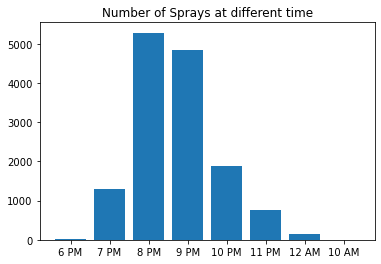

6 PM 15
7 PM 1306
8 PM 5283
9 PM 4849
10 PM 1894
11 PM 758
12 AM 141
10 AM 5


In [7]:
# Look at the range of timing
time = df.Time.astype(str)

time_list = [time[i][:time[i].find(':')]+time[i][time[i].find(' '):] for i,s in enumerate(time)]

#Plot out the count of spray at different timing
time_dict = collections.Counter(time_list)
del time_dict['nan']
time_dict['10 AM'] = time_dict.pop('10 AM')

timing = time_dict.keys()
count = time_dict.values()

plt.title('Number of Sprays at different time')
plt.bar(timing, count)
plt.show()

for k,v in time_dict.items():
    print(k,v)

The spray timing is between 6 pm -12 am and 5 times at 10 am with the spray occurance happening the most between 7-10pm peaking at 8 pm and 9 pm.

As the other datasets do not have such a detailed time feature and there do not seems to be any significant pattern or insights that can be drawn for our particular project, we shall drop this feature to deal with the null values.

In [8]:
df.drop('Time',axis=1,inplace=True)

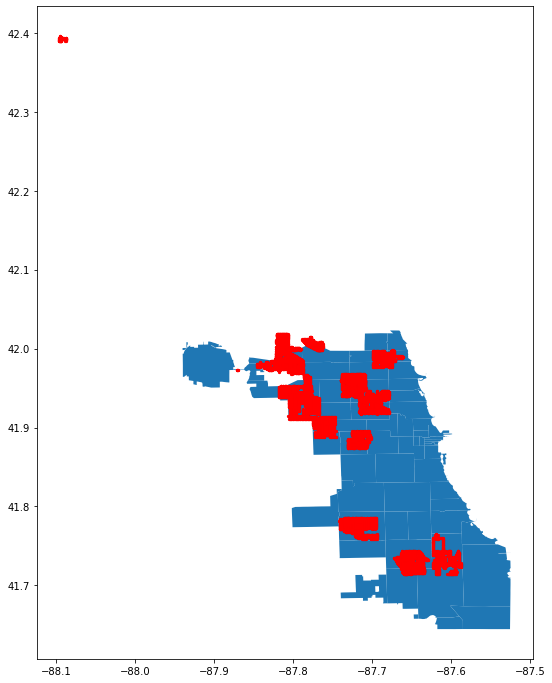

In [9]:
#Look at the coordinates and plot them out

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)
#Map of chicago gotten from: https://catalog.data.gov/dataset/boundaries-zip-codes
chicago = gpd.read_file('../assets/raw_datasets/chicago - ZIP Codes.zip')
gdf.plot(ax=chicago.plot(figsize=(20, 12)), marker='o', color='red', markersize=5);

Looks like some of the sprayed areas recorded is in New York City. Since we are only looking at Chicago, we shall drop rows recored in New York City.

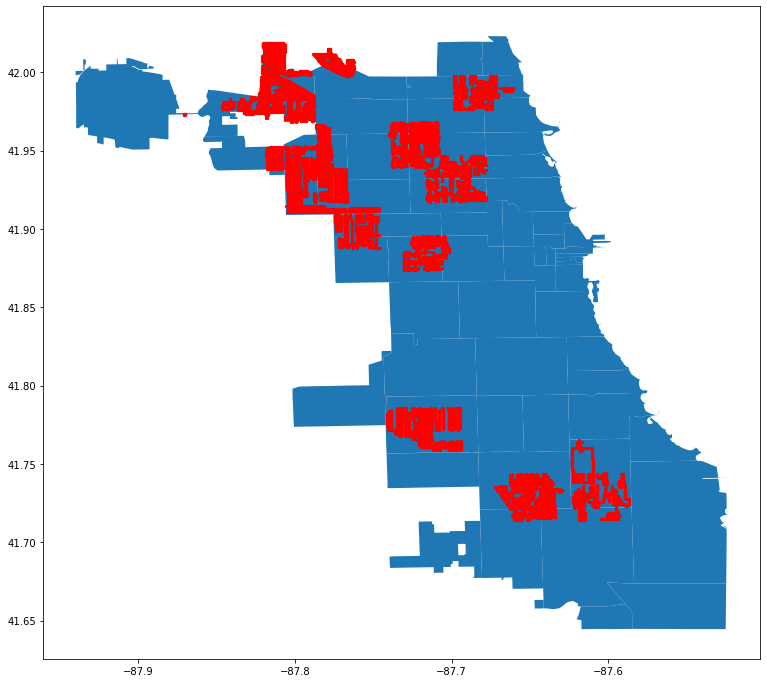

In [10]:
#drop outlier (New York City coordinates)
df = df.drop(df[df['Latitude'] > 42.3].index)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)
#Map of chicago gotten from: https://catalog.data.gov/dataset/boundaries-zip-codes
chicago = gpd.read_file('../assets/raw_datasets/chicago - ZIP Codes.zip')
gdf.plot(ax=chicago.plot(figsize=(20, 12)), marker='o', color='red', markersize=5);

In [11]:
#set date as index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#df.sort_index(inplace=True)

In [12]:
#Check for duplicate rows and drop them
print('Total number of duplicate rows:',df[df.duplicated()].count()[0])
df = df.drop_duplicates()
print('\nShape of spray dataset after cleaning:',df.shape)

Total number of duplicate rows: 541

Shape of spray dataset after cleaning: (14199, 4)


In [13]:
#save cleaned spray dataframe
df.to_csv('../assets/cleaned_datasets/spray_c.csv')